In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

In [52]:
path_to_text = 'books_and_authors'
data = pd.read_csv(path_to_text, names=['v1', 'v2'])

label = data['v1']
text = data['v2']

## TEXT PREPROCESING AND TOKENIZATION

In [53]:
import nltk

nltk.download('omw-1.4')
nltk.download('punkt')

from nltk.corpus import stopwords, wordnet

nltk.download('stopwords')
stopwords_ = stopwords.words('english')

nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
import string

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [54]:

def preprocess_text(text):
    text_preprocessed = []

    for sentence in text:
        #sentence lower
        sentence = sentence.lower()

        #string punct
        sentence = sentence.translate(str.maketrans('', '', string.punctuation))
        #tokenize
        tokens = nltk.word_tokenize(sentence)
        
        # stop-words
        tokens_stop_words = []
        
        for token in tokens:
              if token not in stopwords_:
                    tokens_stop_words.append(token)
                    
        # Lemmatization
        tokens_lemma = []
        for token in tokens_stop_words:
              tokens_lemma.append(wnl.lemmatize(token, get_wordnet_pos(nltk.pos_tag([token])[0][1])))
                
        final = ' '.join(tokens_lemma)
        
        text_preprocessed.append(final)

    return text_preprocessed

text_preprocessed = preprocess_text(text)

In [55]:
len(text_preprocessed), len(label)

(999, 999)

## EXTRACTING TEST AND TRAINING DATA

In [56]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(
    text_preprocessed, label, test_size=0.3, random_state=42)


In [57]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

trainY= le.fit_transform(trainY)
testY = le.transform(testY)

trainY.shape,testY.shape
trainY[0]

3

In [58]:
decodedY = le.inverse_transform([0,1,2,3,4,5,6])

decodedY_dict = dict(enumerate(decodedY))

decodedY_dict

array(['Arthur Conan Doyle', 'Charles Dickens', 'Edgar Allan Poe',
       'George Eliot', 'Jack London', 'Jane Austin', 'Mark Twain'],
      dtype=object)

# COUNT VECTORIZER


In [59]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectors as features
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', ngram_range=(1, 1), max_features=5000)
count_vect.fit(text_preprocessed)

# transform the training and test data using count vectorizer object
trainX_vec = count_vect.transform(trainX)
testX_vec = count_vect.transform(testX)

trainX_vec.shape,
testX_vec.shape

(300, 5000)

In [60]:
dict_ = count_vect.vocabulary_
new_data = pd.DataFrame.from_dict(dict_, orient='index')

#### LOGISTIC REGRESSION




In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

#create an instance of the model
lr_model = LogisticRegression(random_state=7, C=1, max_iter = 500) #pomalo C se poloshi, pogolemo isto poloshi
#train the model
lr_model.fit(trainX_vec, trainY)

#predict test data
pred_test = lr_model.predict(testX_vec)

#print evaluation metrics 
print(classification_report(testY,pred_test))
print(confusion_matrix(testY,pred_test))
print("Accuracy:", accuracy_score(testY, pred_test))


count_vectorizer_lr_accuracy = accuracy_score(testY, pred_test)
count_vectorizer_lr_f1 = f1_score(testY, pred_test, average=None)


              precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.83      0.87      0.85        39
           2       0.70      0.74      0.72        31
           3       0.83      0.95      0.89        65
           4       0.93      0.87      0.90        46
           5       0.76      0.71      0.73        48
           6       0.89      0.76      0.82        41

    accuracy                           0.83       300
   macro avg       0.83      0.81      0.82       300
weighted avg       0.83      0.83      0.83       300

[[24  1  4  0  0  1  0]
 [ 1 34  0  3  1  0  0]
 [ 1  1 23  1  0  5  0]
 [ 0  2  0 62  0  1  0]
 [ 1  0  0  2 40  0  3]
 [ 1  1  5  5  1 34  1]
 [ 0  2  1  2  1  4 31]]
Accuracy: 0.8266666666666667


#### RANDOM FOREST 

In [97]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators=100, random_state=0)

classifier_rf.fit(trainX_vec, trainY)

y_pred_rf = classifier_rf.predict(testX_vec)

score_RF = accuracy_score(testY, y_pred_rf)

print(classification_report(testY, y_pred_rf))
print(confusion_matrix(testY, y_pred_rf))
print("Accuracy:",accuracy_score(testY, y_pred_rf))

count_vectorizer_rf_accuracy = accuracy_score(testY, y_pred_rf)
count_vectorizer_rf_f1 = f1_score(testY, y_pred_rf, average=None)

              precision    recall  f1-score   support

           0       0.89      0.57      0.69        30
           1       0.70      0.85      0.77        39
           2       0.78      0.68      0.72        31
           3       0.75      0.95      0.84        65
           4       0.92      0.78      0.85        46
           5       0.75      0.83      0.79        48
           6       0.78      0.61      0.68        41

    accuracy                           0.78       300
   macro avg       0.80      0.75      0.76       300
weighted avg       0.79      0.78      0.78       300

[[17  3  4  3  0  2  1]
 [ 0 33  0  1  1  2  2]
 [ 1  2 21  2  0  5  0]
 [ 0  0  0 62  1  0  2]
 [ 0  5  0  2 36  2  1]
 [ 1  0  1  5  0 40  1]
 [ 0  4  1  8  1  2 25]]
Accuracy: 0.78


# TFIDF

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words={"english"}, ngram_range=(1, 3)) 
tfidf.fit(text)

X_train_tfidf = tfidf.transform(trainX)
X_test_tfidf = tfidf.transform(testX)

X_train_tfidf.shape, X_test_tfidf.shape

((699, 5000), (300, 5000))

#### LOGISTIC REGRESSION

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

lr_model_tf = LogisticRegression(random_state=0, C=10, max_iter=1000)
lr_model_tf.fit(X_train_tfidf, trainY)
pred_test_tf = lr_model_tf.predict(X_test_tfidf)

#print evaluation metrics 
print(classification_report(testY,pred_test_tf))
print(confusion_matrix(testY,pred_test_tf))
print("Accuracy:",accuracy_score(testY, pred_test_tf))

tfidf_lr_accuracy = accuracy_score(testY, pred_test_tf)
tfidf_lr_f1 = f1_score(testY, pred_test_tf, average=None)

              precision    recall  f1-score   support

           0       0.96      0.73      0.83        30
           1       0.82      0.92      0.87        39
           2       0.75      0.77      0.76        31
           3       0.91      0.98      0.95        65
           4       0.93      0.91      0.92        46
           5       0.89      0.85      0.87        48
           6       0.85      0.83      0.84        41

    accuracy                           0.88       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.88      0.88      0.88       300

[[22  2  3  2  0  1  0]
 [ 0 36  0  0  1  0  2]
 [ 1  1 24  1  0  3  1]
 [ 0  1  0 64  0  0  0]
 [ 0  0  0  1 42  0  3]
 [ 0  1  3  2  1 41  0]
 [ 0  3  2  0  1  1 34]]
Accuracy: 0.8766666666666667


#### RANDOM FOREST


In [98]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators=100, random_state=0)

classifier_rf.fit(X_train_tfidf, trainY)

y_pred_rf = classifier_rf.predict(X_test_tfidf)

score_RF = accuracy_score(testY, y_pred_rf)

print(classification_report(testY, y_pred_rf))
print(confusion_matrix(testY, y_pred_rf))
print("Accuracy:",accuracy_score(testY, y_pred_rf))

tfidf_rf_accuracy = accuracy_score(testY, y_pred_rf)
tfidf_rf_f1 = f1_score(testY, y_pred_rf, average=None)


              precision    recall  f1-score   support

           0       0.89      0.57      0.69        30
           1       0.67      0.82      0.74        39
           2       0.86      0.61      0.72        31
           3       0.83      0.88      0.85        65
           4       0.90      0.78      0.84        46
           5       0.66      0.90      0.76        48
           6       0.62      0.56      0.59        41

    accuracy                           0.76       300
   macro avg       0.78      0.73      0.74       300
weighted avg       0.77      0.76      0.75       300

[[17  2  2  2  1  5  1]
 [ 1 32  0  0  1  2  3]
 [ 0  2 19  1  0  8  1]
 [ 0  1  0 57  0  1  6]
 [ 1  2  0  3 36  1  3]
 [ 0  2  1  2  0 43  0]
 [ 0  7  0  4  2  5 23]]
Accuracy: 0.7566666666666667


#### ENSEMBLE MODEL

0.8833333333333333
              precision    recall  f1-score   support

           0       0.96      0.77      0.85        30
           1       0.90      0.90      0.90        39
           2       0.85      0.74      0.79        31
           3       0.90      0.95      0.93        65
           4       0.93      0.89      0.91        46
           5       0.88      0.94      0.91        48
           6       0.78      0.88      0.83        41

    accuracy                           0.88       300
   macro avg       0.89      0.87      0.87       300
weighted avg       0.89      0.88      0.88       300



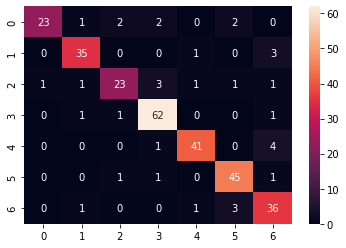

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB

clf1 = SVC(kernel='linear', probability=True)
clf2 = MultinomialNB(alpha=0.01)
clf3 = LogisticRegression(random_state=0, C=10, max_iter=1000)
clf4 = KNeighborsClassifier(n_neighbors=15)

vote_clf = VotingClassifier(estimators=[('svc', clf1), ('mnb', clf2), ('lr', clf3), ('knn', clf4)], voting='soft')

vote_clf = vote_clf.fit(X_train_tfidf, trainY)

y_pred_vote = vote_clf.predict(X_test_tfidf)
score_vote = accuracy_score(testY, y_pred_vote)

print(score_vote)
print(classification_report(testY, vote_clf.predict(X_test_tfidf)))

cm = confusion_matrix(testY, y_pred_vote)

sns.heatmap(cm, annot=True, fmt="d")

tfidf_ens_accuracy = accuracy_score(testY, y_pred_vote)
tfidf_ens_f1 = f1_score(testY, y_pred_vote, average=None)

# HUGGINGFACE TRANSFORMER MODEL

In [ ]:
!pip install datasets transformers[sentencepiece]

from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding
from datasets import Dataset, DatasetDict
import transformers

In [68]:
def prepare_data(X, y):
    data = []
    for i, (sequence, label) in enumerate(zip(X, y)):
        data.append(
        {"paragraph":sequence,
        "label":label,
        "idx":i
        })
        df = pd.DataFrame(data)
    return Dataset.from_pandas(df)

In [69]:
authors_dataset = DatasetDict()

authors_dataset["train"] = prepare_data(trainX, trainY)
authors_dataset["validation"] = prepare_data(testX, testY)

In [70]:
checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(example):
    return tokenizer(example["paragraph"], truncation=True)

tokenized_datasets = authors_dataset.map(tokenize_function, batched=True)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

tf_train_dataset = tokenized_datasets["train"].to_tf_dataset(
columns=["attention_mask", "input_ids", "token_type_ids"],
label_cols=["labels"],
shuffle=True,
collate_fn=data_collator,
batch_size=16,
)

tf_validation_dataset = tokenized_datasets["validation"].to_tf_dataset(
columns=["attention_mask", "input_ids", "token_type_ids"],
label_cols=["labels"],
shuffle=False,
collate_fn=data_collator,
batch_size=16,
)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [71]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=7)

from tensorflow.keras.optimizers.schedules import PolynomialDecay


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_transform', 'vocab_projector', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_59', 'classifier', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [72]:
batch_size = 16
num_epochs = 5
# The number of training steps is the number of samples in the dataset, divided by the batch size then multiplied
# by the total number of epochs. Note that the tf_train_dataset here is a batched tf.data.Dataset,
# not the original Hugging Face Dataset, so its len() is already num_samples // batch_size.
num_train_steps = len(tf_train_dataset) * num_epochs

lr_scheduler = PolynomialDecay(
initial_learning_rate=5e-5, end_learning_rate=0.0, decay_steps=num_train_steps
)
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=lr_scheduler)

In [73]:
import tensorflow as tf

model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=7)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])
model_history = model.fit(tf_train_dataset, validation_data=tf_validation_dataset, epochs=num_epochs)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_transform', 'vocab_projector', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_79', 'classifier', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

Epoch 1/5
43/43 [==============================] - 58s 1s/step - loss: 1.7111 - accuracy: 0.3561 - val_loss: 1.3420 - val_accuracy: 0.5833
Epoch 2/5
43/43 [==============================] - 44s 1s/step - loss: 0.9881 - accuracy: 0.7384 - val_loss: 0.7935 - val_accuracy: 0.7700
Epoch 3/5
43/43 [==============================] - 43s 1s/step - loss: 0.4745 - accuracy: 0.9099 - val_loss: 0.5910 - val_accuracy: 0.8300
Epoch 4/5
43/43 [==============================] - 43s 1s/step - loss: 0.2294 - accuracy: 0.9738 - val_loss: 0.4754 - val_accuracy: 0.8467
Epoch 5/5
43/43 [==============================] - 42s 974ms/step - loss: 0.1536 - accuracy: 0.9942 - val_loss: 0.4545 - val_accuracy: 0.8533


In [74]:
val_acc = model_history.history['val_accuracy']
val_acc.sort(reverse=True)
transformer_accuracy = val_acc[0]

# MODEL EXPLAINABILITY

### TFIDF - LOGISTIC REGRESSION

In [75]:
!pip install shap
import shap

In [76]:
explainer = shap.LinearExplainer(lr_model_tf, masker=shap.maskers.Independent(X_train_tfidf))

shap_values = explainer.shap_values(X_test_tfidf)

In [77]:
shap.summary_plot(shap_values, X_test_tfidf, feature_names=tfidf.get_feature_names_out(), class_names=decodedY )


In [79]:
shap.initjs()
ind = 14
author_index = 3

shap.force_plot(
explainer.expected_value[author_index], shap_values[author_index][ind,:], X_test_tfidf.toarray()[ind,:],
feature_names=tfidf.get_feature_names_out(), link='logit'
)

### TRANSFORMER

In [80]:
import transformers

pipeline_distilbert = transformers.pipeline("text-classification", model=model, tokenizer=AutoTokenizer.from_pretrained("distilbert-base-uncased"), device=0, return_all_scores=True)

explainer_distilbert = shap.Explainer(pipeline_distilbert, output_names=decodedY)

shap_values = explainer_distilbert(testX[14:17])

shap.plots.text(shap_values)

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  33%|███▎      | 1/3 [00:00<?, ?it/s]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 3/3 [01:08<00:00, 16.95s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 4it [01:41, 34.00s/it]


In [100]:
{
    'count_vectorizer_rf_accuracy': count_vectorizer_rf_accuracy,
    'count_vectorizer_rf_f1': count_vectorizer_rf_f1.mean(), 

    'count_vectorizer_lr_accuracy': count_vectorizer_lr_accuracy, 
    'count_vectorizer_lr_f1': count_vectorizer_lr_f1.mean(),

    'tfidf_lr_accuracy': tfidf_lr_accuracy,
    'tfidf_lr_f1': tfidf_lr_f1.mean(), 

    'tfidf_rf_accuracy': tfidf_rf_accuracy, 
    'tfidf_rf_f1': tfidf_rf_f1.mean(),

    'tfidf_ens_accuracy': tfidf_ens_accuracy, 
    'tfidf_ens_f1': tfidf_ens_f1.mean(),

    'transformer_accuracy': transformer_accuracy,

}

{'count_vectorizer_lr_accuracy': 0.8266666666666667,
 'count_vectorizer_lr_f1': 0.8182713094983365,
 'count_vectorizer_rf_accuracy': 0.78,
 'count_vectorizer_rf_f1': 0.7639092455224806,
 'tfidf_ens_accuracy': 0.8833333333333333,
 'tfidf_ens_f1': 0.8736503655700775,
 'tfidf_lr_accuracy': 0.8766666666666667,
 'tfidf_lr_f1': 0.8632335700378013,
 'tfidf_rf_accuracy': 0.7566666666666667,
 'tfidf_rf_f1': 0.7407502820903525,
 'transformer_accuracy': 0.8533333539962769}

In [82]:
test_text = preprocess_text(['So Ernest Darling, a bag of bones and a death’s-head, a perambulating corpse, with just the dimmest flutter of life in it to make it perambulate, turned his back upon men and the habitations of men and dragged himself for five miles through the brush, away from the city of Portland, Oregon. Of course he was crazy. Only a lunatic would drag himself out of his death-bed.'])
pipeline_distilbert(test_text)

[[{'label': 'LABEL_0', 'score': 0.06550567597150803},
  {'label': 'LABEL_1', 'score': 0.34019917249679565},
  {'label': 'LABEL_2', 'score': 0.013476856052875519},
  {'label': 'LABEL_3', 'score': 0.022590750828385353},
  {'label': 'LABEL_4', 'score': 0.358977347612381},
  {'label': 'LABEL_5', 'score': 0.1620151698589325},
  {'label': 'LABEL_6', 'score': 0.037235062569379807}]]

In [83]:
test_text = preprocess_text(['So Ernest Darling, a bag of bones and a death’s-head, a perambulating corpse, with just the dimmest flutter of life in it to make it perambulate, turned his back upon men and the habitations of men and dragged himself for five miles through the brush, away from the city of Portland, Oregon. Of course he was crazy. Only a lunatic would drag himself out of his death-bed.'])

test_text = tfidf.transform(test_text)

# decodedY_dict[]
vote_clf.predict_proba(test_text), decodedY_dict

(array([[0.09702735, 0.18286806, 0.05129261, 0.04852584, 0.11093248,
         0.36376233, 0.14559133]]),
 {0: 'Arthur Conan Doyle',
  1: 'Charles Dickens',
  2: 'Edgar Allan Poe',
  3: 'George Eliot',
  4: 'Jack London',
  5: 'Jane Austin',
  6: 'Mark Twain'})